# Beacon

In [2]:
%load_ext autoreload
%autoreload 2
# %autoreload? for help
import cv2
import numpy as np
import math
#import picamera
import io
from IPython.display import Image
import time
import glob
from termcolor import colored
import math
import re
import cv2
import numpy as np
from matplotlib import pyplot as plt
from fct import * 

In [4]:
center = (561,340)

In [62]:
math.degrees(math.acos(4000/(math.sqrt(4000*4000+3500*3500))))+90

131.18592516570965

In [68]:
math.degrees(math.acos(3500/(math.sqrt(4000*4000+3500*3500))))+180

228.81407483429035

In [65]:
-math.degrees(math.acos(4000/(math.sqrt(4000*4000+4500*4500))))+90

41.6335393365702

In [99]:
boundariesyb = [
     ([0, 0, 215], [255, 153, 255], 'r', (0,0,255), (0,8000)),
     ([0, 200, 97], [255, 255, 255], 'y', (0,255,255), (0,0)),
     ([230, 141, 0], [255, 244, 255], 'b', (255,0,0), (8000,0))
]

In [134]:
boundaries = [
         ([0, 0, 180], [255, 153, 255], 'r', (0,0,255), (0,8000)),
         ([0, 200, 97], [255, 255, 255], 'y', (0,255,255), (0,0)),
         ([230, 141, 0], [255, 225, 255], 'b', (255,0,0), (8000,0)),
         ([77, 240, 0], [255, 244, 255], 'g', (0,255,0), (8000,8000))
    ]

In [36]:
findCenter(250,800,150,600,41.63,131.186,132.81,boundariesyb,center)

NameError: name 'boundariesyb' is not defined

# HSV Filtering

In [129]:
findThreshold()

KeyboardInterrupt: 

# Find angles

In [120]:
angles = [71.98789058174849, -145.93112292241142, 149.43373011044545]
objct = [41,131,-132]
lights_coordinates = (0,8000),(8000,0),(8000,8000)
find_robot_pos(angles,lights_coordinates)

(5614.862515051702, 5123.721306328642, 80.89351641727978)

time:  0.023851871490478516
[-154.1790080258107, -82.08249696517166, 89.06591244603084, 151.49598847818856]


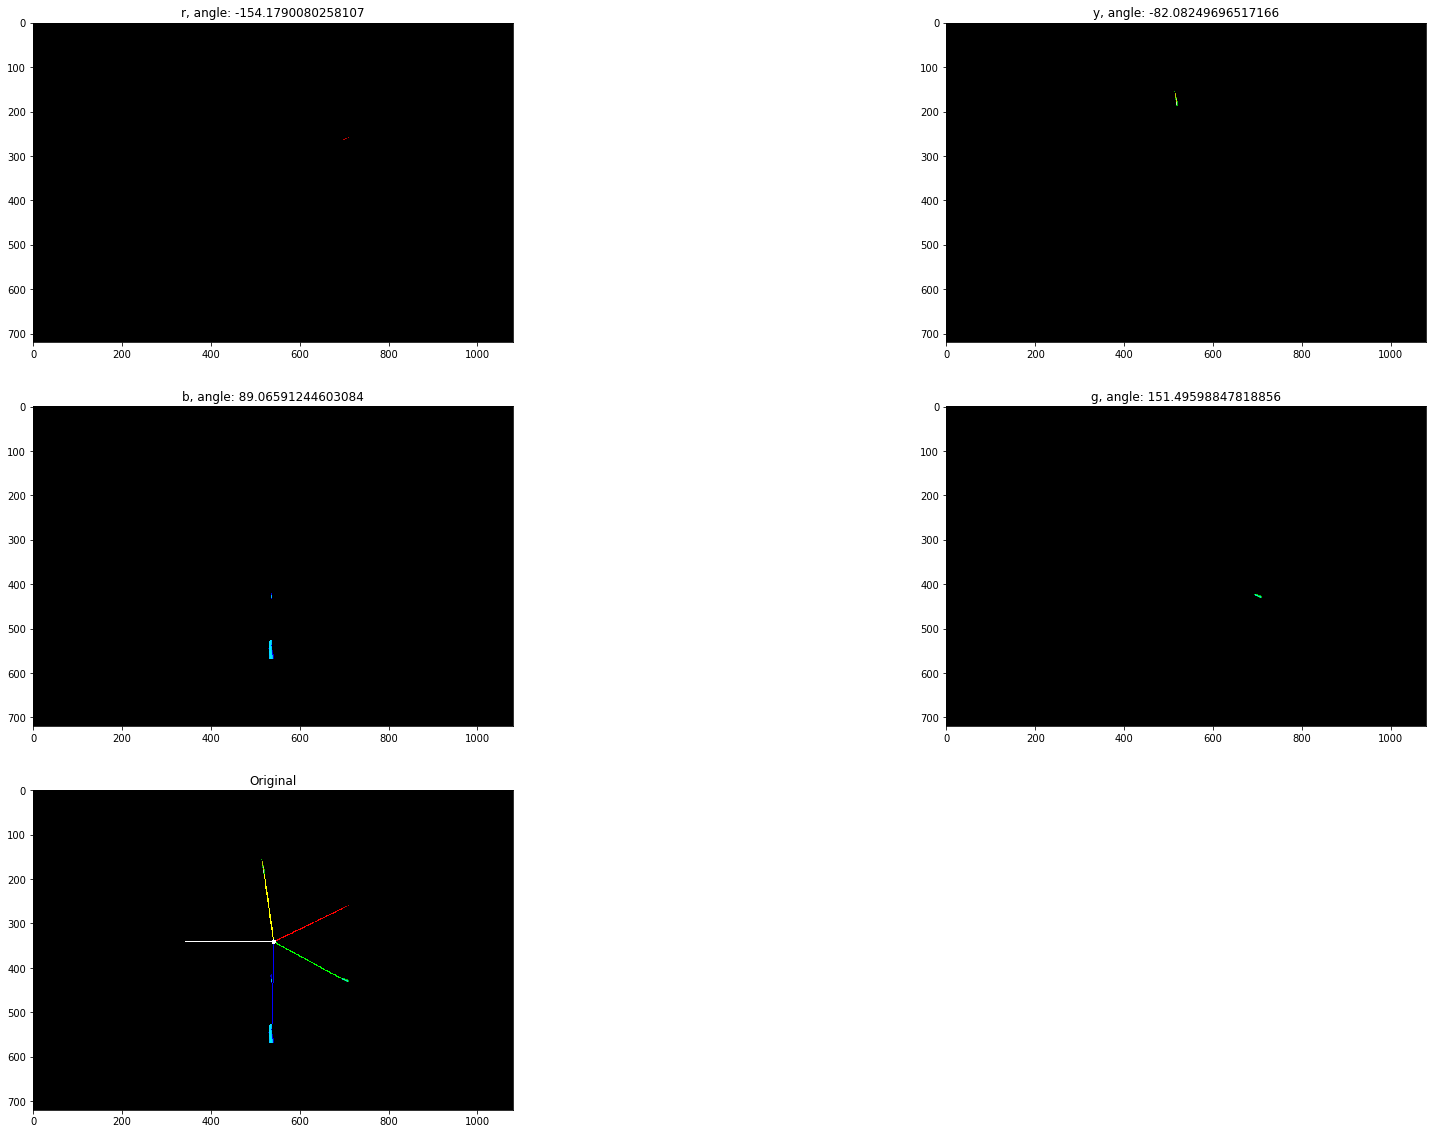

([-154.1790080258107,
  -82.08249696517166,
  89.06591244603084,
  151.49598847818856],
 [(0, 8000), (0, 0), (8000, 0), (8000, 8000)])

In [135]:
threshImg = cv2.imread('threshold_img.png') 
find_angles_with_display(threshImg,(541,341),boundaries)

# Find position

In [80]:
angles = [135.6342447144261, -33.79165568107351, -36.94316586615346]

lights_coordinates = (0,8000),(0,0),(8000,0)
find_robot_pos(angles,lights_coordinates)

(39009.49650144433, -8848.163632576357, 201.0120159556278)

In [63]:
angles = [-46.4840146756621, 33.16322463213728, 149.53445508054014]

lights_coordinates = (0,8000),(0,0),(8000,0)
find_robot_pos(angles,lights_coordinates)

(4491.698262670371, 2454.3370435178, -184.51031408322436)

In [136]:
center_circles = (532, 340)
center_beacon = (541,357)
i = 0
images_ = []
titles_ = []
for filename in glob.glob("./*.png"):
    start = time.time()
    i = i + 1
    print("-- Picture: ", filename[2:-4], '--')
    elements = re.findall('[+-]?\d+', filename)
    x,y,a = elements[0],elements[1],elements[2]
    x,y,a = float(x),float(y),float(a)
    center = (532, 357)
    rawImage = cv2.imread(filename)    
    height,width,depth = rawImage.shape
    imgWithCircle  = np.zeros((height,width), np.uint8)
    cv2.circle(imgWithCircle,center,225,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center,45,(0,0,0),thickness=-1)
    imask = imgWithCircle>0
    img1 = np.zeros_like(rawImage, np.uint8)
    img1[imask] = rawImage[imask]

    imgWithCircle  = np.ones((height,width), np.uint8)
    cv2.circle(imgWithCircle,center,165,(0,0,0),thickness=-1)
    cv2.circle(imgWithCircle,center,75,(255,255,255),thickness=-1)
    imask = imgWithCircle>0
    img = np.zeros_like(img1, np.uint8)
    img[imask] = img1[imask]

    ret,thresh_img = cv2.threshold(img,160,0,cv2.THRESH_TOZERO)
    
    thresh_img,angles,lights_coordinates = find_angles_and_get_result(thresh_img,center_beacon,boundaries)
    
    thresh_img[np.where((thresh_img==[0,0,0]).all(axis=2))] = [160,160,160]
    images_.append(thresh_img)
    titles_.append(filename)
    if len(angles) < 3:
        print("less than 3 lights found")
        continue

    xb,yb,ab = find_robot_pos(angles,lights_coordinates)   
    print("angles: ", angles)
    print("Lights' positions: ", lights_coordinates)
    print("position from beacon: ",xb,yb,ab)
    print("real position: ",x,y,a)
    dist = math.sqrt((x-xb)*(x-xb) + (y-yb)*(y-yb))
    angle_error = (a - ab)%360
    if dist > 300 or angle_error > 10:    
        print(colored("Error distance: {}, error angle: {}".format(dist,angle_error), 'red'))
        print(colored('ERROR', 'red'))
    else:
        print(colored("Error distance: {}, error angle: {}".format(dist,angle_error), 'green'))
        print(colored('GOOD', 'green'))
    print("time to do everything: ", time.time() - start)


-- Picture:  beacon_1000_1000_270 --
angles:  [-166.70142966950573, -42.5529513576764, 89.67991517621833, -42.5529513576764]
Lights' positions:  [(0, 8000), (0, 0), (8000, 0), (8000, 8000)]
position from beacon:  907.6790827445 798.4795141390483 -96.10916543502196
real position:  1000.0 1000.0 270.0
Error distance: 221.6611332293754, error angle: 6.109165435021964
GOOD
time to do everything:  0.16643071174621582
-- Picture:  beacon_1000_3500_180 --
angles:  [-76.6075022462489, 78.7564588977868, 157.8806371764177, 79.15265315704653]
Lights' positions:  [(0, 8000), (0, 0), (8000, 0), (8000, 8000)]
position from beacon:  851.3426824912673 3351.9004272473776 -183.00755756331318
real position:  1000.0 3500.0 180.0
Error distance: 209.8391800841813, error angle: 3.007557563313185
GOOD
time to do everything:  0.16924476623535156
-- Picture:  beacon_250_4000_180 --
angles:  [-85.20796595306805, 93.0848123304976, 158.38522105721373, -148.6840197522475]
Lights' positions:  [(0, 8000), (0, 0), (8

IndexError: list index out of range

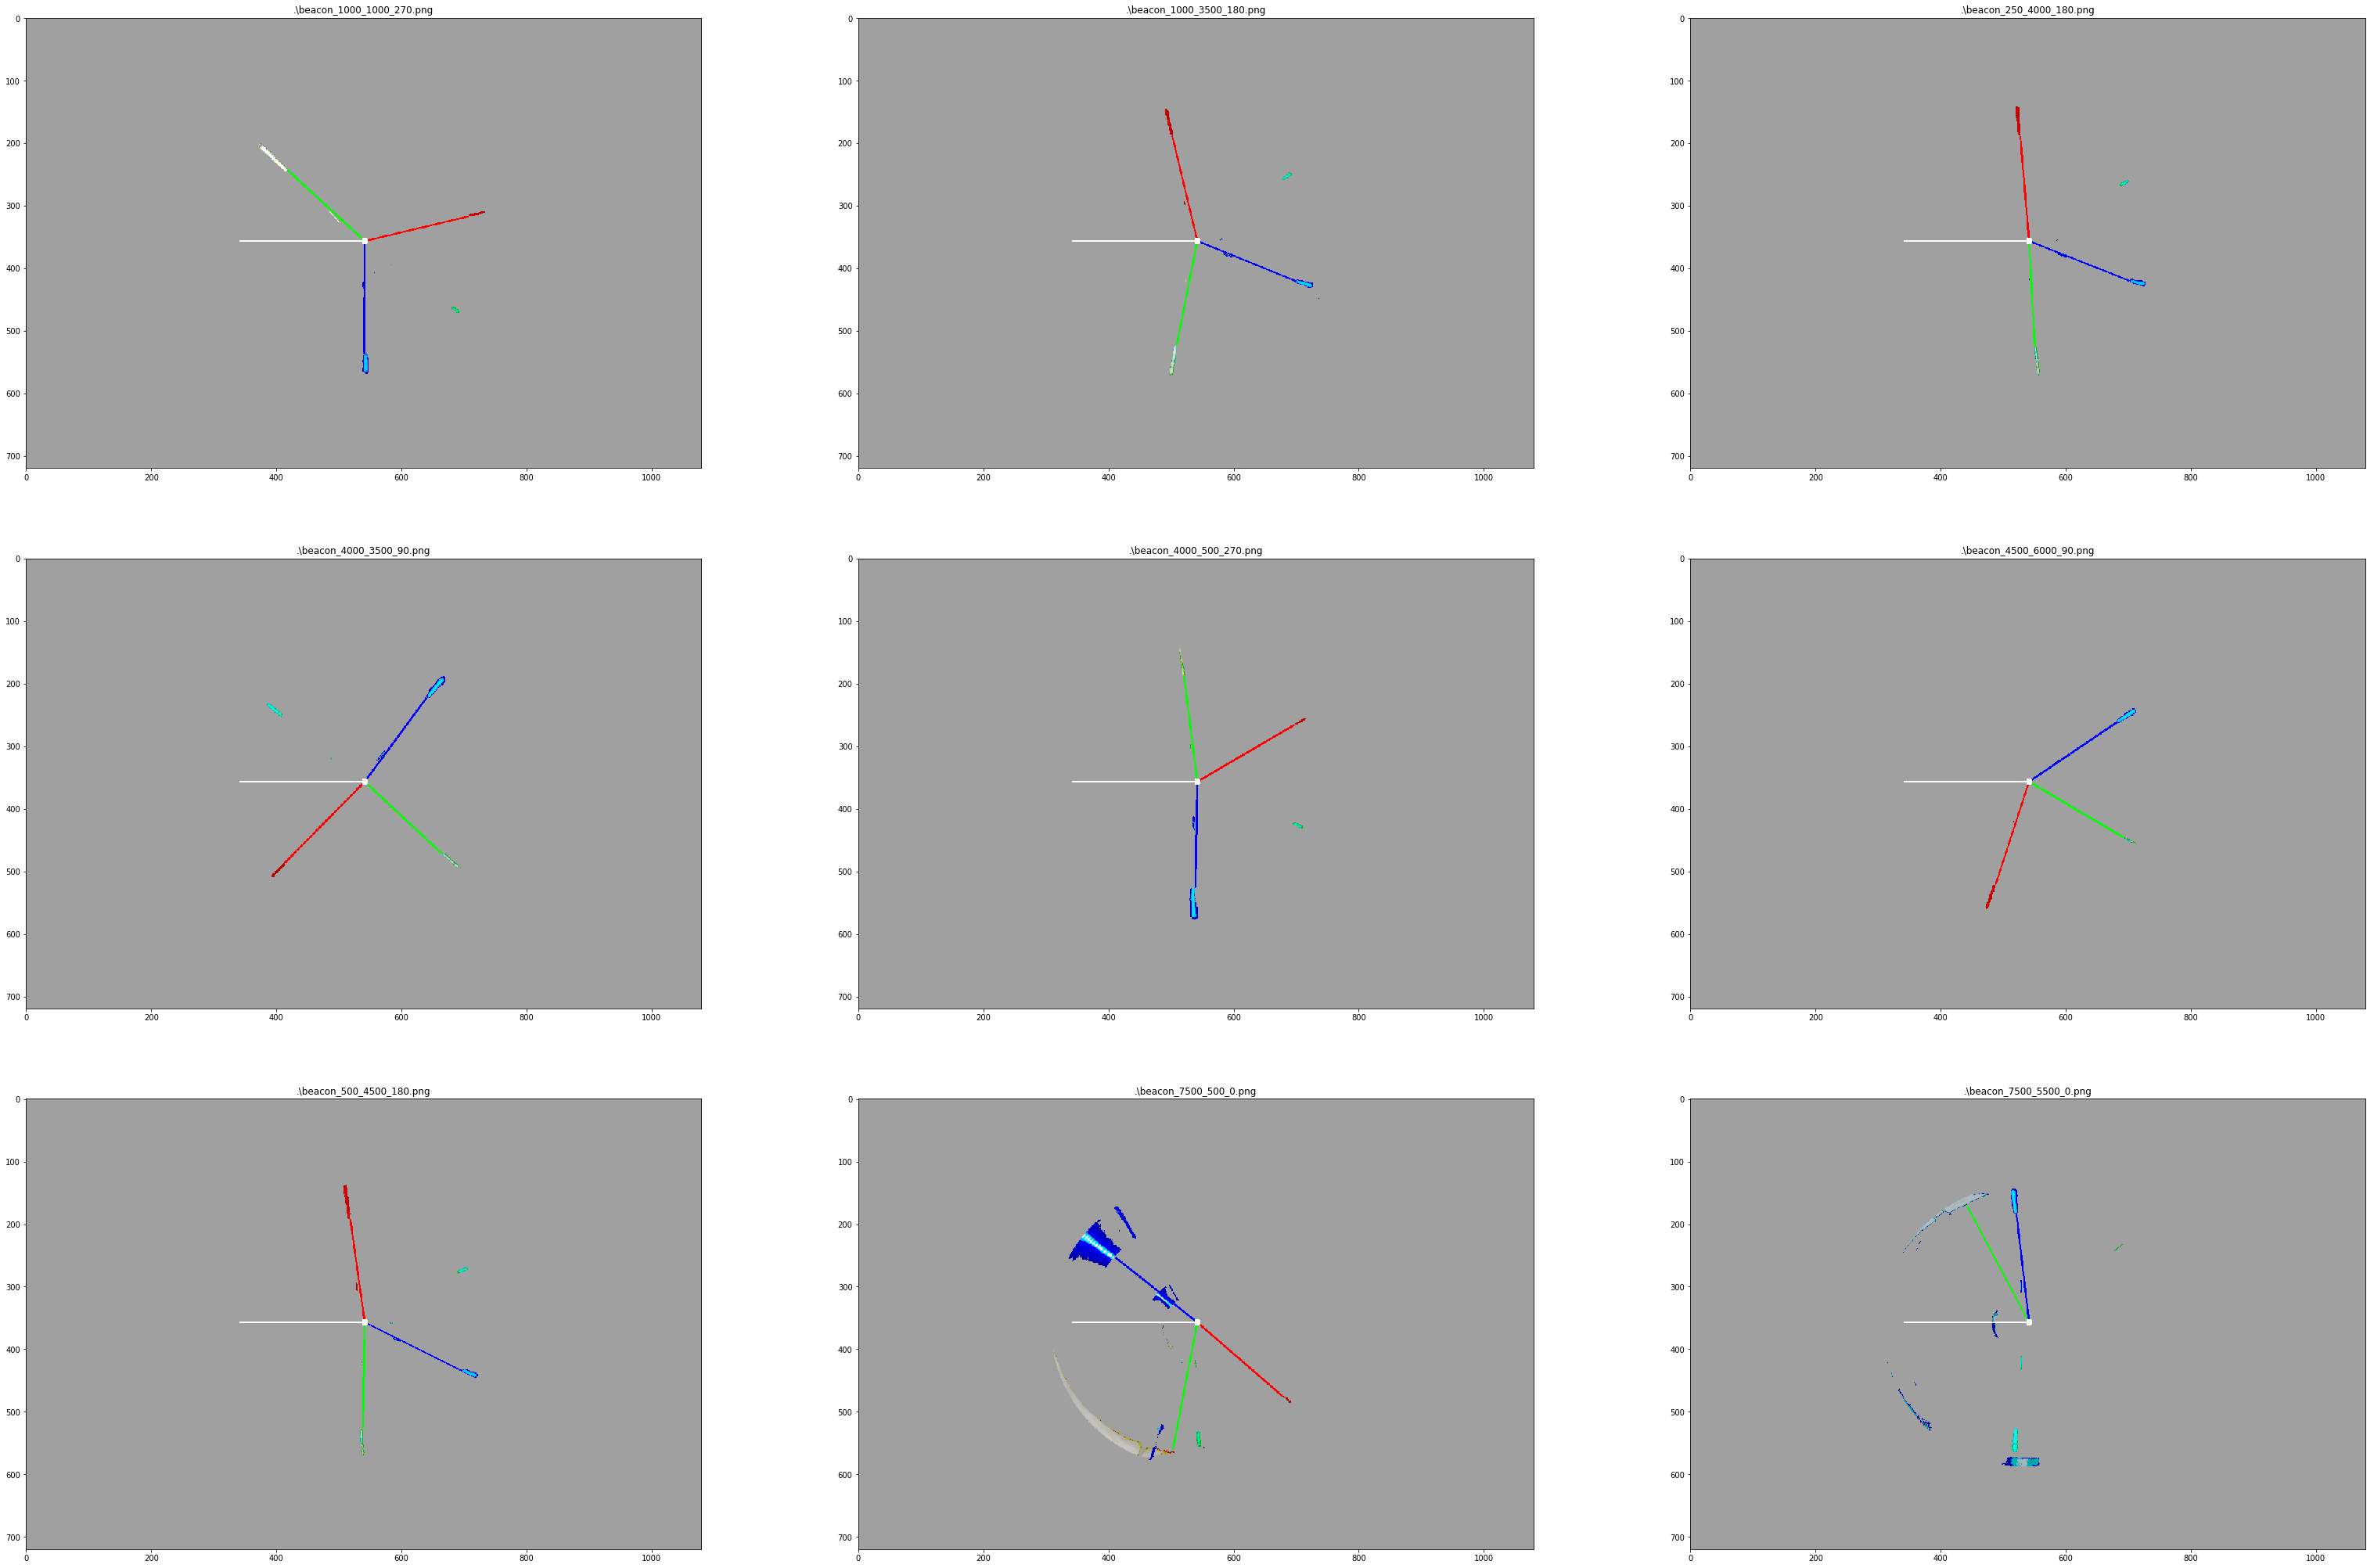

In [123]:
show_images(images_, cols = 3, titles = titles_)

# Create image with all lights

In [89]:
245*1.5

367.5

In [124]:
center = (532, 357)
rawImage = cv2.imread('beacon_4000_500_270.png')    
height,width,depth = rawImage.shape
imgWithCircle  = np.zeros((height,width), np.uint8)
cv2.circle(imgWithCircle,center,207,(255,255,255),thickness=-1)
cv2.circle(imgWithCircle,center,45,(0,0,0),thickness=-1)
imask = imgWithCircle>0
img1 = np.zeros_like(rawImage, np.uint8)
img1[imask] = rawImage[imask]

imgWithCircle  = np.ones((height,width), np.uint8)
cv2.circle(imgWithCircle,center,165,(0,0,0),thickness=-1)
cv2.circle(imgWithCircle,center,75,(255,255,255),thickness=-1)
imask = imgWithCircle>0
img = np.zeros_like(img1, np.uint8)
img[imask] = img1[imask]

ret,thresh_img = cv2.threshold(img,170,0,cv2.THRESH_TOZERO)
#thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('threshold_img.png',thresh_img)

True

In [71]:
center = (340, 245)
rawImage = cv2.imread('highreso_4000_3500_180.png')    
height,width,depth = rawImage.shape
imgWithCircle  = np.zeros((height,width), np.uint8)
cv2.circle(imgWithCircle,center,140,(255,255,255),thickness=-1)
cv2.circle(imgWithCircle,center,30,(0,0,0),thickness=-1)
imask = imgWithCircle>0
img1 = np.zeros_like(rawImage, np.uint8)
img1[imask] = rawImage[imask]

imgWithCircle  = np.ones((height,width), np.uint8)
cv2.circle(imgWithCircle,center,110,(0,0,0),thickness=-1)
cv2.circle(imgWithCircle,center,50,(255,255,255),thickness=-1)
imask = imgWithCircle>0
img = np.zeros_like(img1, np.uint8)
img[imask] = img1[imask]

ret,thresh_img = cv2.threshold(img,160,0,cv2.THRESH_TOZERO)
#thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('threshold_img.png',thresh_img)

AttributeError: 'NoneType' object has no attribute 'shape'

# Create image with only far lights

In [3]:
center = (940, 632)
rawImage = cv2.imread('newbeacon_4000_3500_180.png')    
height,width,depth = rawImage.shape
imgWithCircle  = np.zeros((height,width), np.uint8)
cv2.circle(imgWithCircle,center,400,(255,255,255),thickness=-1)
cv2.circle(imgWithCircle,center,280,(0,0,0),thickness=-1)
imask = imgWithCircle>0
img = np.zeros_like(rawImage, np.uint8)
img[imask] = rawImage[imask]
ret,thresh_img = cv2.threshold(img,232,0,cv2.THRESH_TOZERO)
#thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('threshold_img.png',thresh_img)

True

# Verifying images thresholding

1
2
g not found
3
4
g not found
5
g not found
6
7
8
9
g not found
10
b not found
g not found
11
r not found
g not found
12
13
14
15


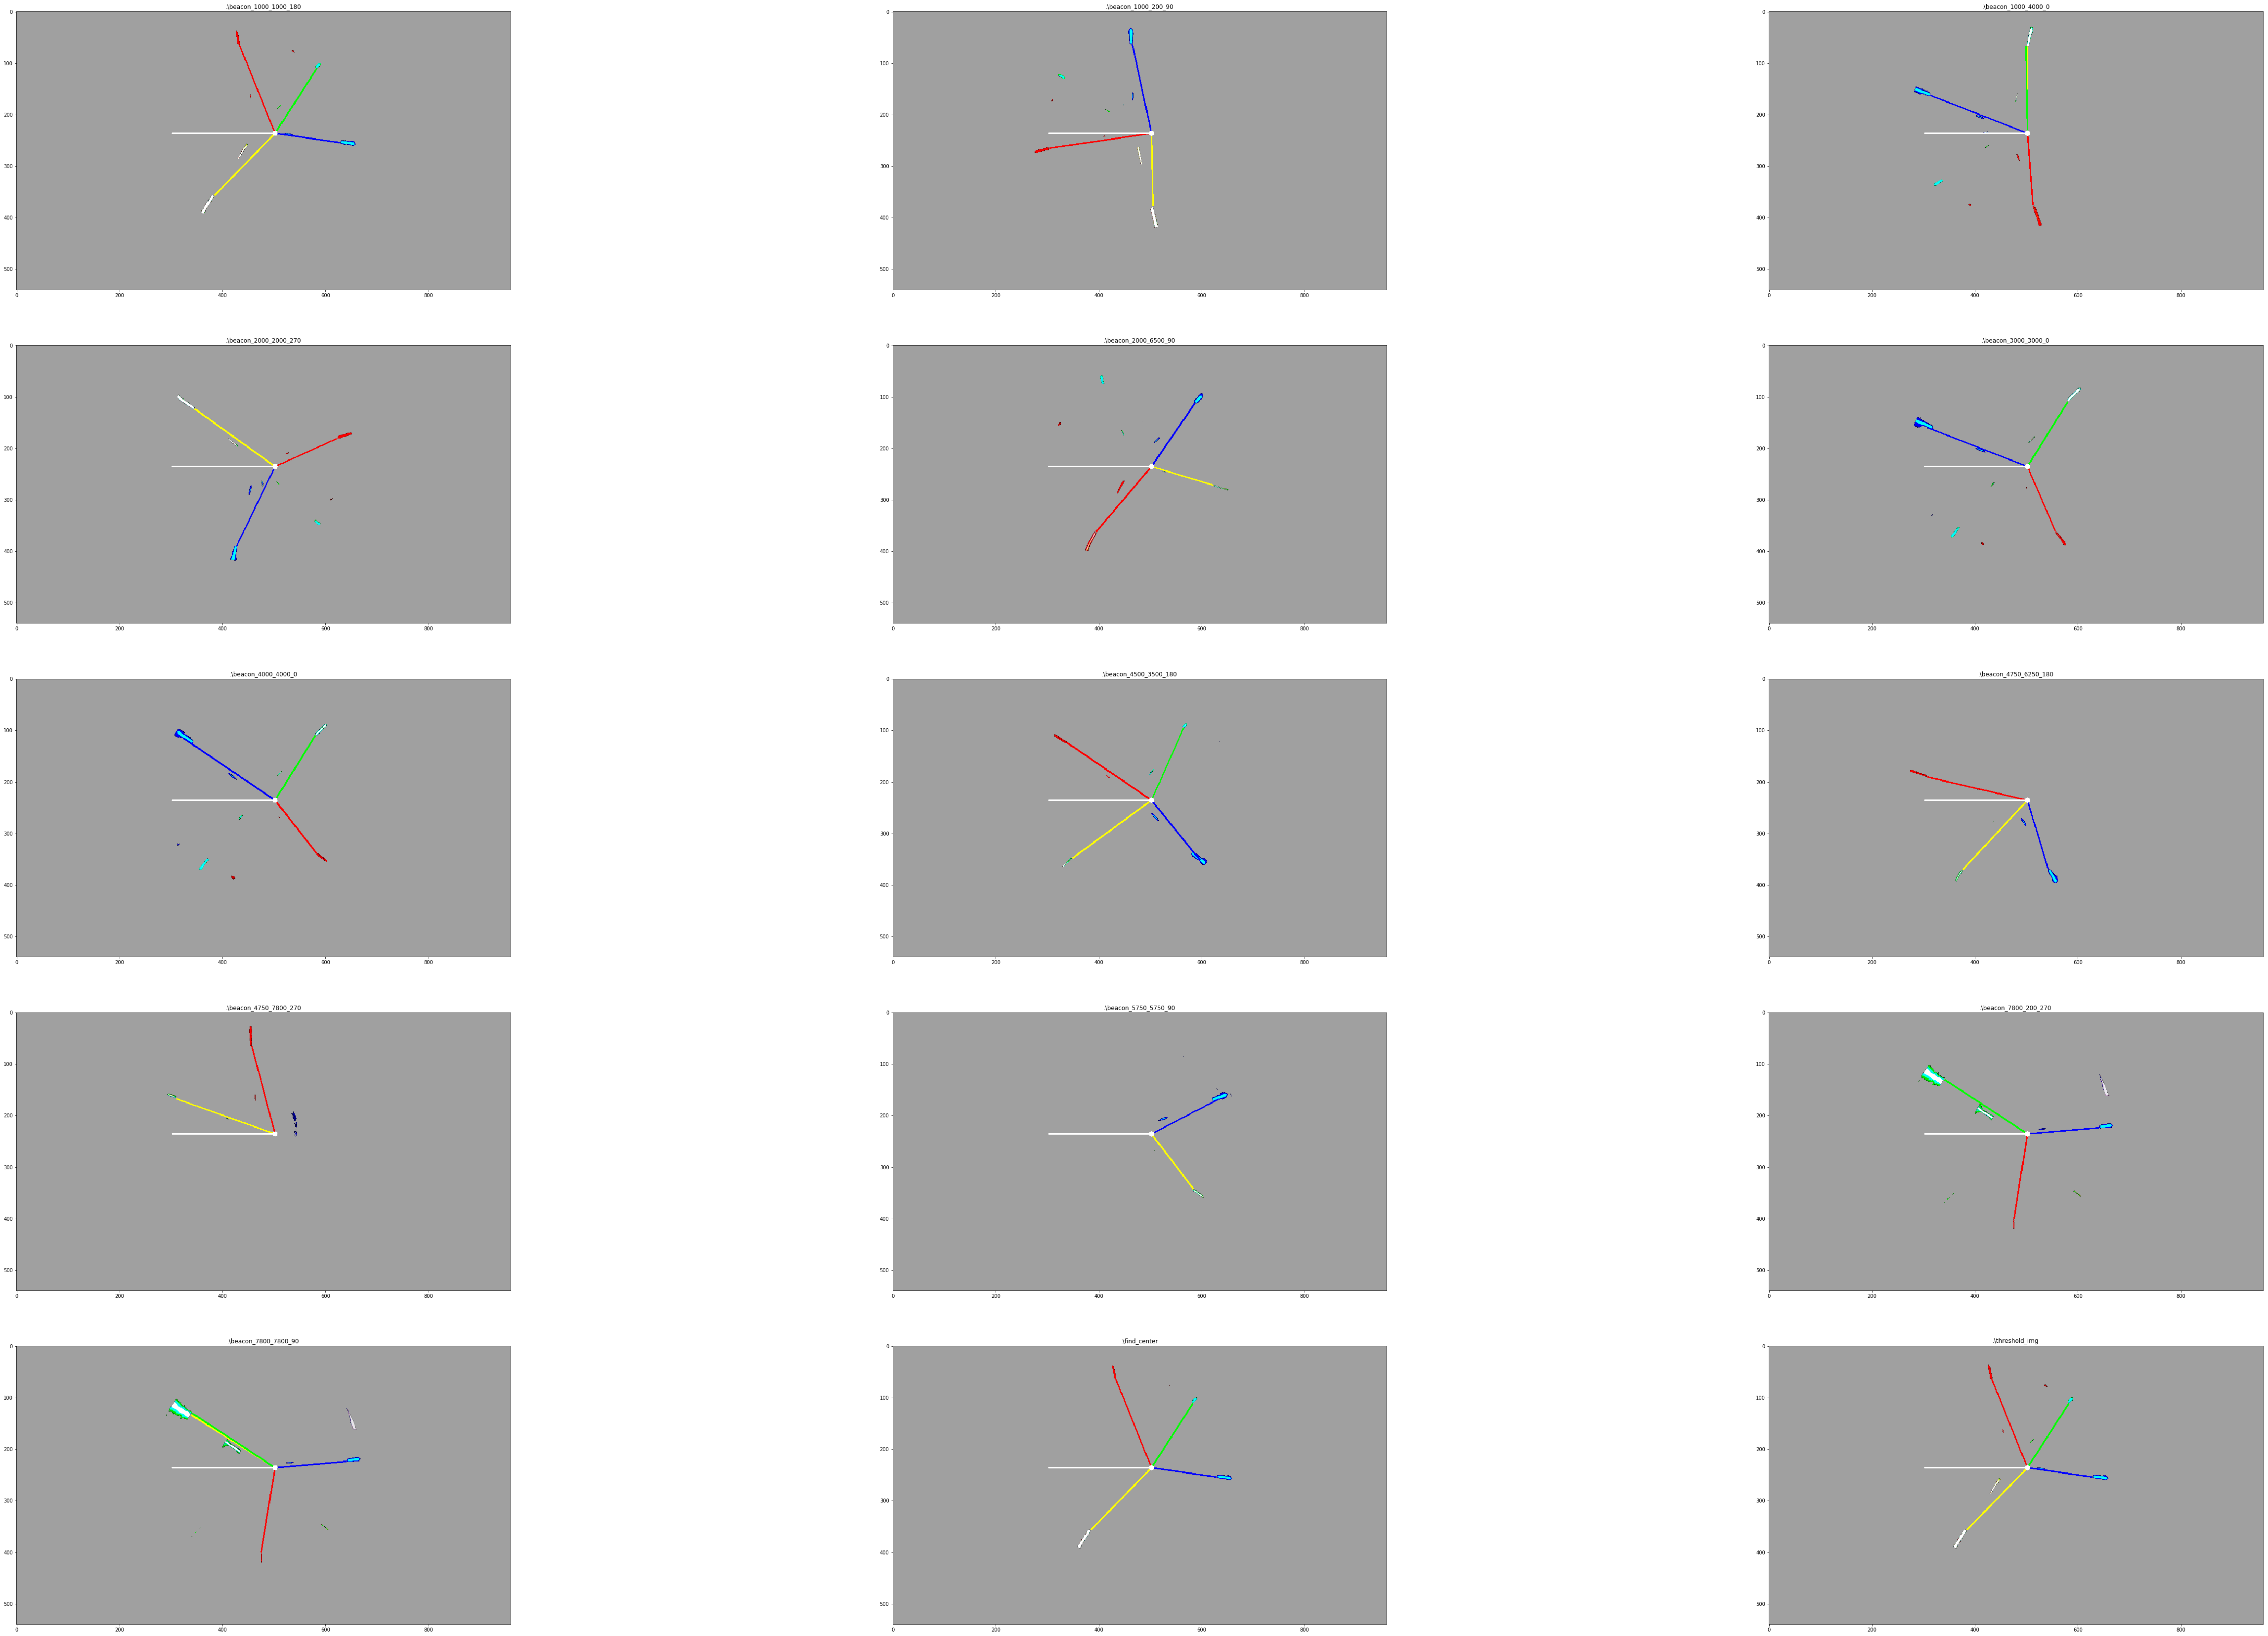

In [37]:

center_circles = (940, 632)
center_beacon = (502, 236)
i = 1
images = []
titles = []
for filename in glob.glob("./*.png"):
    print(i)
    i=i+1
    rawImage = cv2.imread(filename)    
    height,width,depth = rawImage.shape
    imgWithCircle  = np.zeros((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,400,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,80,(0,0,0),thickness=-1)
    imask = imgWithCircle>0
    img1 = np.zeros_like(rawImage, np.uint8)
    img1[imask] = rawImage[imask]

    imgWithCircle  = np.ones((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,320,(0,0,0),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,150,(255,255,255),thickness=-1)
    imask = imgWithCircle>0
    img = np.zeros_like(img1, np.uint8)
    img[imask] = img1[imask]

    ret,thresh_img = cv2.threshold(img,220,0,cv2.THRESH_TOZERO)
    
    thresh_img,_ = find_angles_and_get_result(thresh_img,center_beacon)
    thresh_img[np.where((thresh_img==[0,0,0]).all(axis=2))] = [160,160,160]
    images.append(thresh_img)
    titles.append(filename[:-4])
    
show_images(images, cols = 5, titles = titles)

In [ ]:
center = (385, 253)
i = 1
images = []
titles = []
for filename in glob.glob("./*.png"):
    rawImage = cv2.imread(filename)    
    height,width,depth = rawImage.shape
    imgWithCircle  = np.zeros((height,width), np.uint8)
    cv2.circle(imgWithCircle,center,400,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center,80,(0,0,0),thickness=-1)
    imask = imgWithCircle>0
    img1 = np.zeros_like(rawImage, np.uint8)
    img1[imask] = rawImage[imask]

    imgWithCircle  = np.ones((height,width), np.uint8)
    cv2.circle(imgWithCircle,center,320,(0,0,0),thickness=-1)
    cv2.circle(imgWithCircle,center,150,(255,255,255),thickness=-1)
    imask = imgWithCircle>0
    img = np.zeros_like(img1, np.uint8)
    img[imask] = img1[imask]

    ret,thresh_img = cv2.threshold(img,220,0,cv2.THRESH_TOZERO)
    thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
    images.append(thresh_img)
    titles.append(filename[:-4])
show_images(images, cols = 3, titles = titles)